### Pair III
# Covarianza y Correlación

In [7]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Para visualizar todas las columnas 
# -----------------------------------------------------------------------
pd.options.display.max_columns = None 

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral")

# Establecer tamaño fijo de gráficas
# ==================================
#plt.rcParams["figure.figsize"] = (10,8)

# Para la gestión de los warning
# ======================
import warnings
warnings.filterwarnings('ignore')

1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

Tanto la covarianza como la correlación nos dan información de la relación entre dos variables:

- La covarianza: indica si las dos variables varían en la misma dirección, puede ser + o -

    - (+) Al aumentar una, aumenta la otra.

    - (-) Al aumentar una, disminuye la otra.

- La correlación: dos variables están correlacionadas cuando una nos da información de la otra. No nos indica unicamente la dirección (positiva o negativa), nos indica además la fuerza de esa relación, varía entre -1 y 1:

    - 0 No hay relación entre las variables.

    - Positiva, cuando aumenta una, aumenta la otra.

    - Negativa, cuando disminuye una, aumenta la otra.


2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

4. Guardad la gráfica del heatmap.

In [8]:
df = pd.read_pickle("../data/cost_of_living_pair2.pkl")
df.head(2)

ciudad   pais continente  salario  cesta_compra  bebidas_super  \
0     Delhi  India       Asia   586.35      1.602857         3.5475   
1  Shanghai  China       Asia  1382.83      3.862857         4.3575   

   bebidas_rest  comida_rest     ropa  deportes  cine  marlboro  educacion  \
0         1.592    10.406667  37.7500     14.77  4.90      4.28      73.76   
1         2.022    17.230000  77.7925     38.95  8.38      3.49    1356.63   

   transporte  gasolina  vehiculos  internet  movil  gastos_fijos   alquiler  \
0       2.834      1.25  17607.475      7.96   0.01         57.37   319.8075   
1       7.880      1.17  19957.900     16.74   0.03         64.76  1537.2925   

          m2  inte_fij_hipo  
0   1844.180           7.96  
1  13253.985           5.01

```Covarianza```

In [9]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.cov()

salario  cesta_compra  bebidas_super  bebidas_rest  \
salario        2.085889e+06   1429.731915     997.051432   1279.208563   
cesta_compra   1.429732e+03      2.084908       1.124437      1.307815   
bebidas_super  9.970514e+02      1.124437       1.893514      0.998713   
bebidas_rest   1.279209e+03      1.307815       0.998713      1.451498   
comida_rest    1.064321e+04     11.175536       7.015101     10.386525   
ropa           1.082033e+04     14.647849       6.878851     11.417665   
deportes       6.477967e+03      7.600228       4.813717      5.931256   
cine           4.244082e+03      4.256812       2.717662      3.715301   
marlboro       3.503145e+03      3.182707       2.746326      3.418800   
educacion      4.584390e+05    432.752343     300.483389    379.271921   
transporte     7.182052e+03      7.191995       4.489866      6.569525   
gasolina       2.081203e+02      0.212040       0.023770      0.227332   
vehiculos      1.041660e+06   1928.318185    1163.437295   1481.620478   
internet       1.848858e+04     19.765087      17.796822     17.273860   
movil          4.251435e+01      0.050956       0.031162      0.036304   
gastos_fijos   5.319718e+04     56.788529      25.663605     52.043652   
alquiler       7.133678e+05    651.396263     477.816987    593.670054   
m2             1.421691e+06   1585.470008    1005.000825   1393.265305   
inte_fij_hipo -2.993725e+03     -3.024981      -1.611346     -2.742491   

                comida_rest          ropa      deportes         cine  \
salario        10643.213080  10820.333056   6477.967331  4244.082489   
cesta_compra      11.175536     14.647849      7.600228     4.256812   
bebidas_super      7.015101      6.878851      4.813717     2.717662   
bebidas_rest      10.386525     11.417665      5.931256     3.715301   
comida_rest      112.369793    120.420254     58.556257    32.033924   
ropa             120.420254    452.988100     90.884205    39.144222   
deportes          58.556257     90.884205    122.755112    21.213904   
cine              32.033924     39.144222     21.213904    16.076908   
marlboro          29.266581     33.599684     14.397110    10.706746   
educacion       3226.263234   3311.734578   1892.827625  1260.197798   
transporte        60.595813     71.106156     37.276145    23.014160   
gasolina           2.303394      3.338352      1.091323     0.759268   
vehiculos      15773.855819  44645.731902  12505.623997  3791.522158   
internet         136.783393    134.039385    109.635245    53.909465   
movil              0.358354      0.434635      0.299100     0.144004   
gastos_fijos     465.782553    614.549134    289.083819   177.909495   
alquiler        5096.358591   5278.968852   3646.810929  1881.811867   
m2             11940.243531  15929.181020  12179.355328  4203.829368   
inte_fij_hipo    -23.527466    -26.680978    -15.038728   -10.139510   

                  marlboro      educacion   transporte    gasolina  \
salario        3503.145293  458439.045481  7182.052125  208.120287   
cesta_compra      3.182707     432.752343     7.191995    0.212040   
bebidas_super     2.746326     300.483389     4.489866    0.023770   
bebidas_rest      3.418800     379.271921     6.569525    0.227332   
comida_rest      29.266581    3226.263234    60.595813    2.303394   
ropa             33.599684    3311.734578    71.106156    3.338352   
deportes         14.397110    1892.827625    37.276145    1.091323   
cine             10.706746    1260.197798    23.014160    0.759268   
marlboro         17.861021    1160.359800    20.014790    0.771796   
educacion      1160.359800  233059.576198  2260.763934   58.359431   
transporte       20.014790    2260.763934    65.487967    1.649801   
gasolina          0.771796      58.359431     1.649801    0.216321   
vehiculos      2723.766138  361075.105856  8272.318224  239.819850   
internet         50.492508    5322.848761    94.653665   -0.036237   
movil             0.130768      12.676109     0.

En cuanto a la covarianza, observamos que existe covarianza positiva entre casi todas las variables. Esto tiene sentido porque al final los precios van modificándose en función de otros precios o del salario de ese lugar. Por otro lado, hemos encontrado que la variable "inte_fijo_hipo" tiene una covarianza negativa con respecto a todas las variables salvo con la variable "vehículos". A su vez, la variable "vehículos" es la única variable que muestra una covarianza positiva con todas las demás variables. Por otro lado, la variable "bebida_super" tiene covarianza positiva con todas, salvo con la variable "gasolina" que presenta una escasa covarianza negativa con -0.0008.

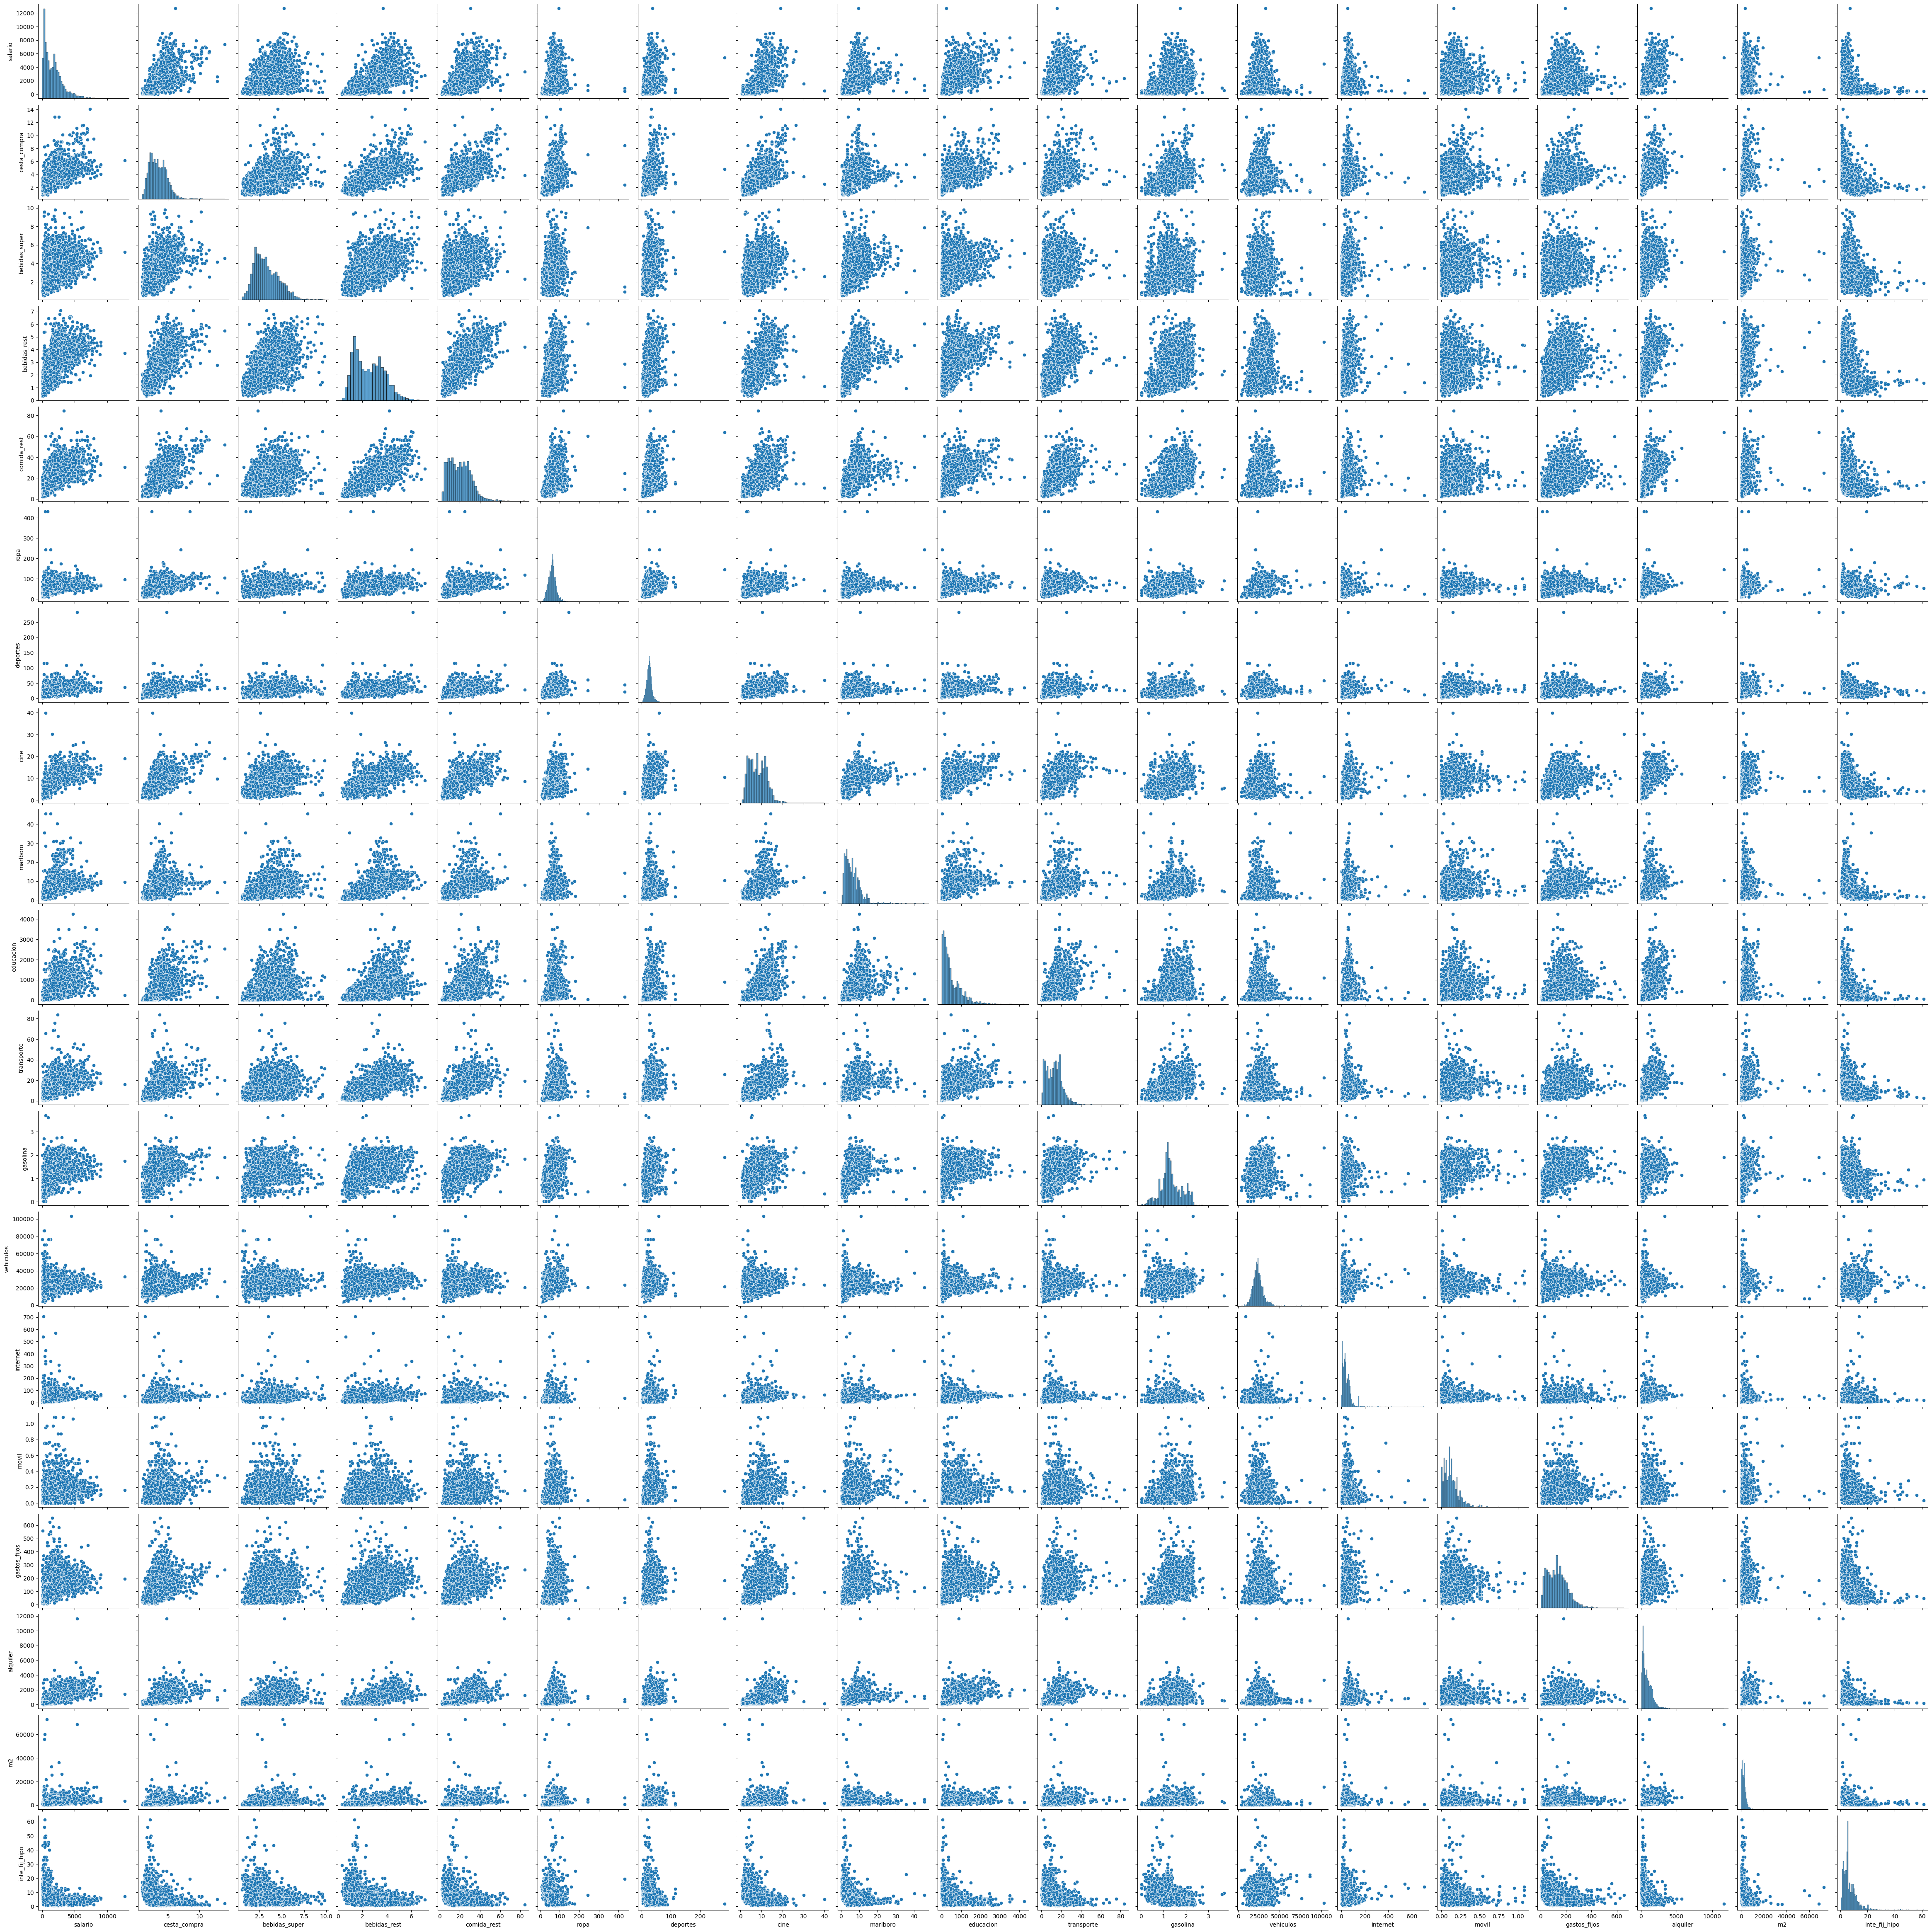

In [10]:
sns.pairplot(df, palette= qualitative_colors[4])
plt.savefig("../graficas/03_cov_corr_pairplot.png");

A partir de esta gráfica, podemos ver más fácilmente que existe covarianza entre las variables al ver esas agrupaciones de puntos y poca dispersión.

```Correlación```

In [5]:
df_numericas.corr()

salario  cesta_compra  bebidas_super  bebidas_rest  \
salario        1.000000      0.685592       0.501693      0.735169   
cesta_compra   0.685592      1.000000       0.565923      0.751787   
bebidas_super  0.501693      0.565923       1.000000      0.602418   
bebidas_rest   0.735169      0.751787       0.602418      1.000000   
comida_rest    0.695188      0.730130       0.480922      0.813275   
ropa           0.352007      0.476636       0.234876      0.445272   
deportes       0.404831      0.475076       0.315738      0.444343   
cine           0.732887      0.735258       0.492561      0.769103   
marlboro       0.573931      0.521555       0.472242      0.671448   
educacion      0.657510      0.620815       0.452327      0.652092   
transporte     0.614500      0.615496       0.403198      0.673822   
gasolina       0.309827      0.315736       0.037140      0.405698   
vehiculos      0.102813      0.190373       0.120525      0.175307   
internet       0.367052      0.392487       0.370833      0.411103   
movil          0.268531      0.321927       0.206583      0.274884   
gastos_fijos   0.463768      0.495193       0.234823      0.543898   
alquiler       0.734362      0.670725       0.516262      0.732621   
m2             0.355982      0.397085       0.264120      0.418210   
inte_fij_hipo -0.406743     -0.411086      -0.229778     -0.446674   

               comida_rest      ropa  deportes      cine  marlboro  educacion  \
salario           0.695188  0.352007  0.404831  0.732887  0.573931   0.657510   
cesta_compra      0.730130  0.476636  0.475076  0.735258  0.521555   0.620815   
bebidas_super     0.480922  0.234876  0.315738  0.492561  0.472242   0.452327   
bebidas_rest      0.813275  0.445272  0.444343  0.769103  0.671448   0.652092   
comida_rest       1.000000  0.533742  0.498573  0.753675  0.653272   0.630437   
ropa              0.533742  1.000000  0.385412  0.458694  0.373541   0.322314   
deportes          0.498573  0.385412  1.000000  0.477529  0.307470   0.353881   
cine              0.753675  0.458694  0.477529  1.000000  0.631834   0.651034   
marlboro          0.653272  0.373541  0.307470  0.631834  1.000000   0.568730   
educacion         0.630437  0.322314  0.353881  0.651034  0.568730   1.000000   
transporte        0.706378  0.412841  0.415748  0.709272  0.585217   0.578683   
gasolina          0.467190  0.337240  0.211779  0.407141  0.392645   0.259913   
vehiculos         0.212121  0.299024  0.160900  0.134798  0.091873   0.106619   
internet          0.369980  0.180575  0.283727  0.385508  0.342565   0.316141   
movil             0.308385  0.186289  0.246264  0.327627  0.282262   0.239529   
gastos_fijos      0.553243  0.363556  0.328520  0.558670  0.449579   0.418721   
alquiler          0.714789  0.368764  0.489368  0.697778  0.567212   0.668304   
m2                0.407340  0.270657  0.397533  0.379151  0.292645   0.333964   
inte_fij_hipo    -0.435516 -0.245987 -0.266345 -0.496215 -0.406351  -0.332955   

               transporte  gasolina  vehiculos  internet     movil  \
salario          0.614500  0.309827   0.102813  0.367052  0.268531   
cesta_compra     0.615496  0.315736   0.190373  0.392487  0.321927   
bebidas_super    0.403198  0.037140   0.120525  0.370833  0.206583   
bebidas_rest     0.673822  0.405698   0.175307  0.411103  0.274884   
comida_rest      0.706378  0.467190   0.212121  0.369980  0.308385   
ropa             0.412841  0.337240   0.299024  0.180575  0.186289   
deportes         0.415748  0.211779   0.160900  0.283727  0.246264   
cine             0.709272  0.407141   0.134798  0.385508  0.327627   
marlboro         0.585217  0.392645   0.091873  0.342565  0.282262   
educacion        0.578683  0.259913   0.106619  0.316141  0.239529   
transporte       1.000000  0.438330   0.145719  0.335372  0.299228   
gasolina         0.438330  1.000000   0.073503 -0.002234  0.234580   
vehiculos        0.145719  0.073503   1.000000  0.084762  0.022387   
internet      

* Podemos observar que en el caso de nuestra variable respuesta "salario" solo tiene correlación negativa con "inte_fij_hipo" (el interés fijo de las hipotecas) y con el resto de variables tiene una correlación positiva, pero no llega ninguna a ser muy alta, dado que no alcanza el 0.7. Sin embargo, encontramos que tiene una correlación positiva un poco alta con "bebidas_rest", "comida_rest", "cine" y "alquiler". Esto tiene sentido porque a mayor salario, más posibilidades se tiene de ir a comer o tomar una bebida en un restaurante, invertir el dinero en ir al cine o acceder a un alquiler más caro.  
  
* En cuanto a la variable "bebidas_rest" tiene una correlación alta con "comida_rest" y "cine". Encontramos el sentido porque si el precio de una bebida aumenta en un restaurante, también subirá probablemente en la comida.


3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

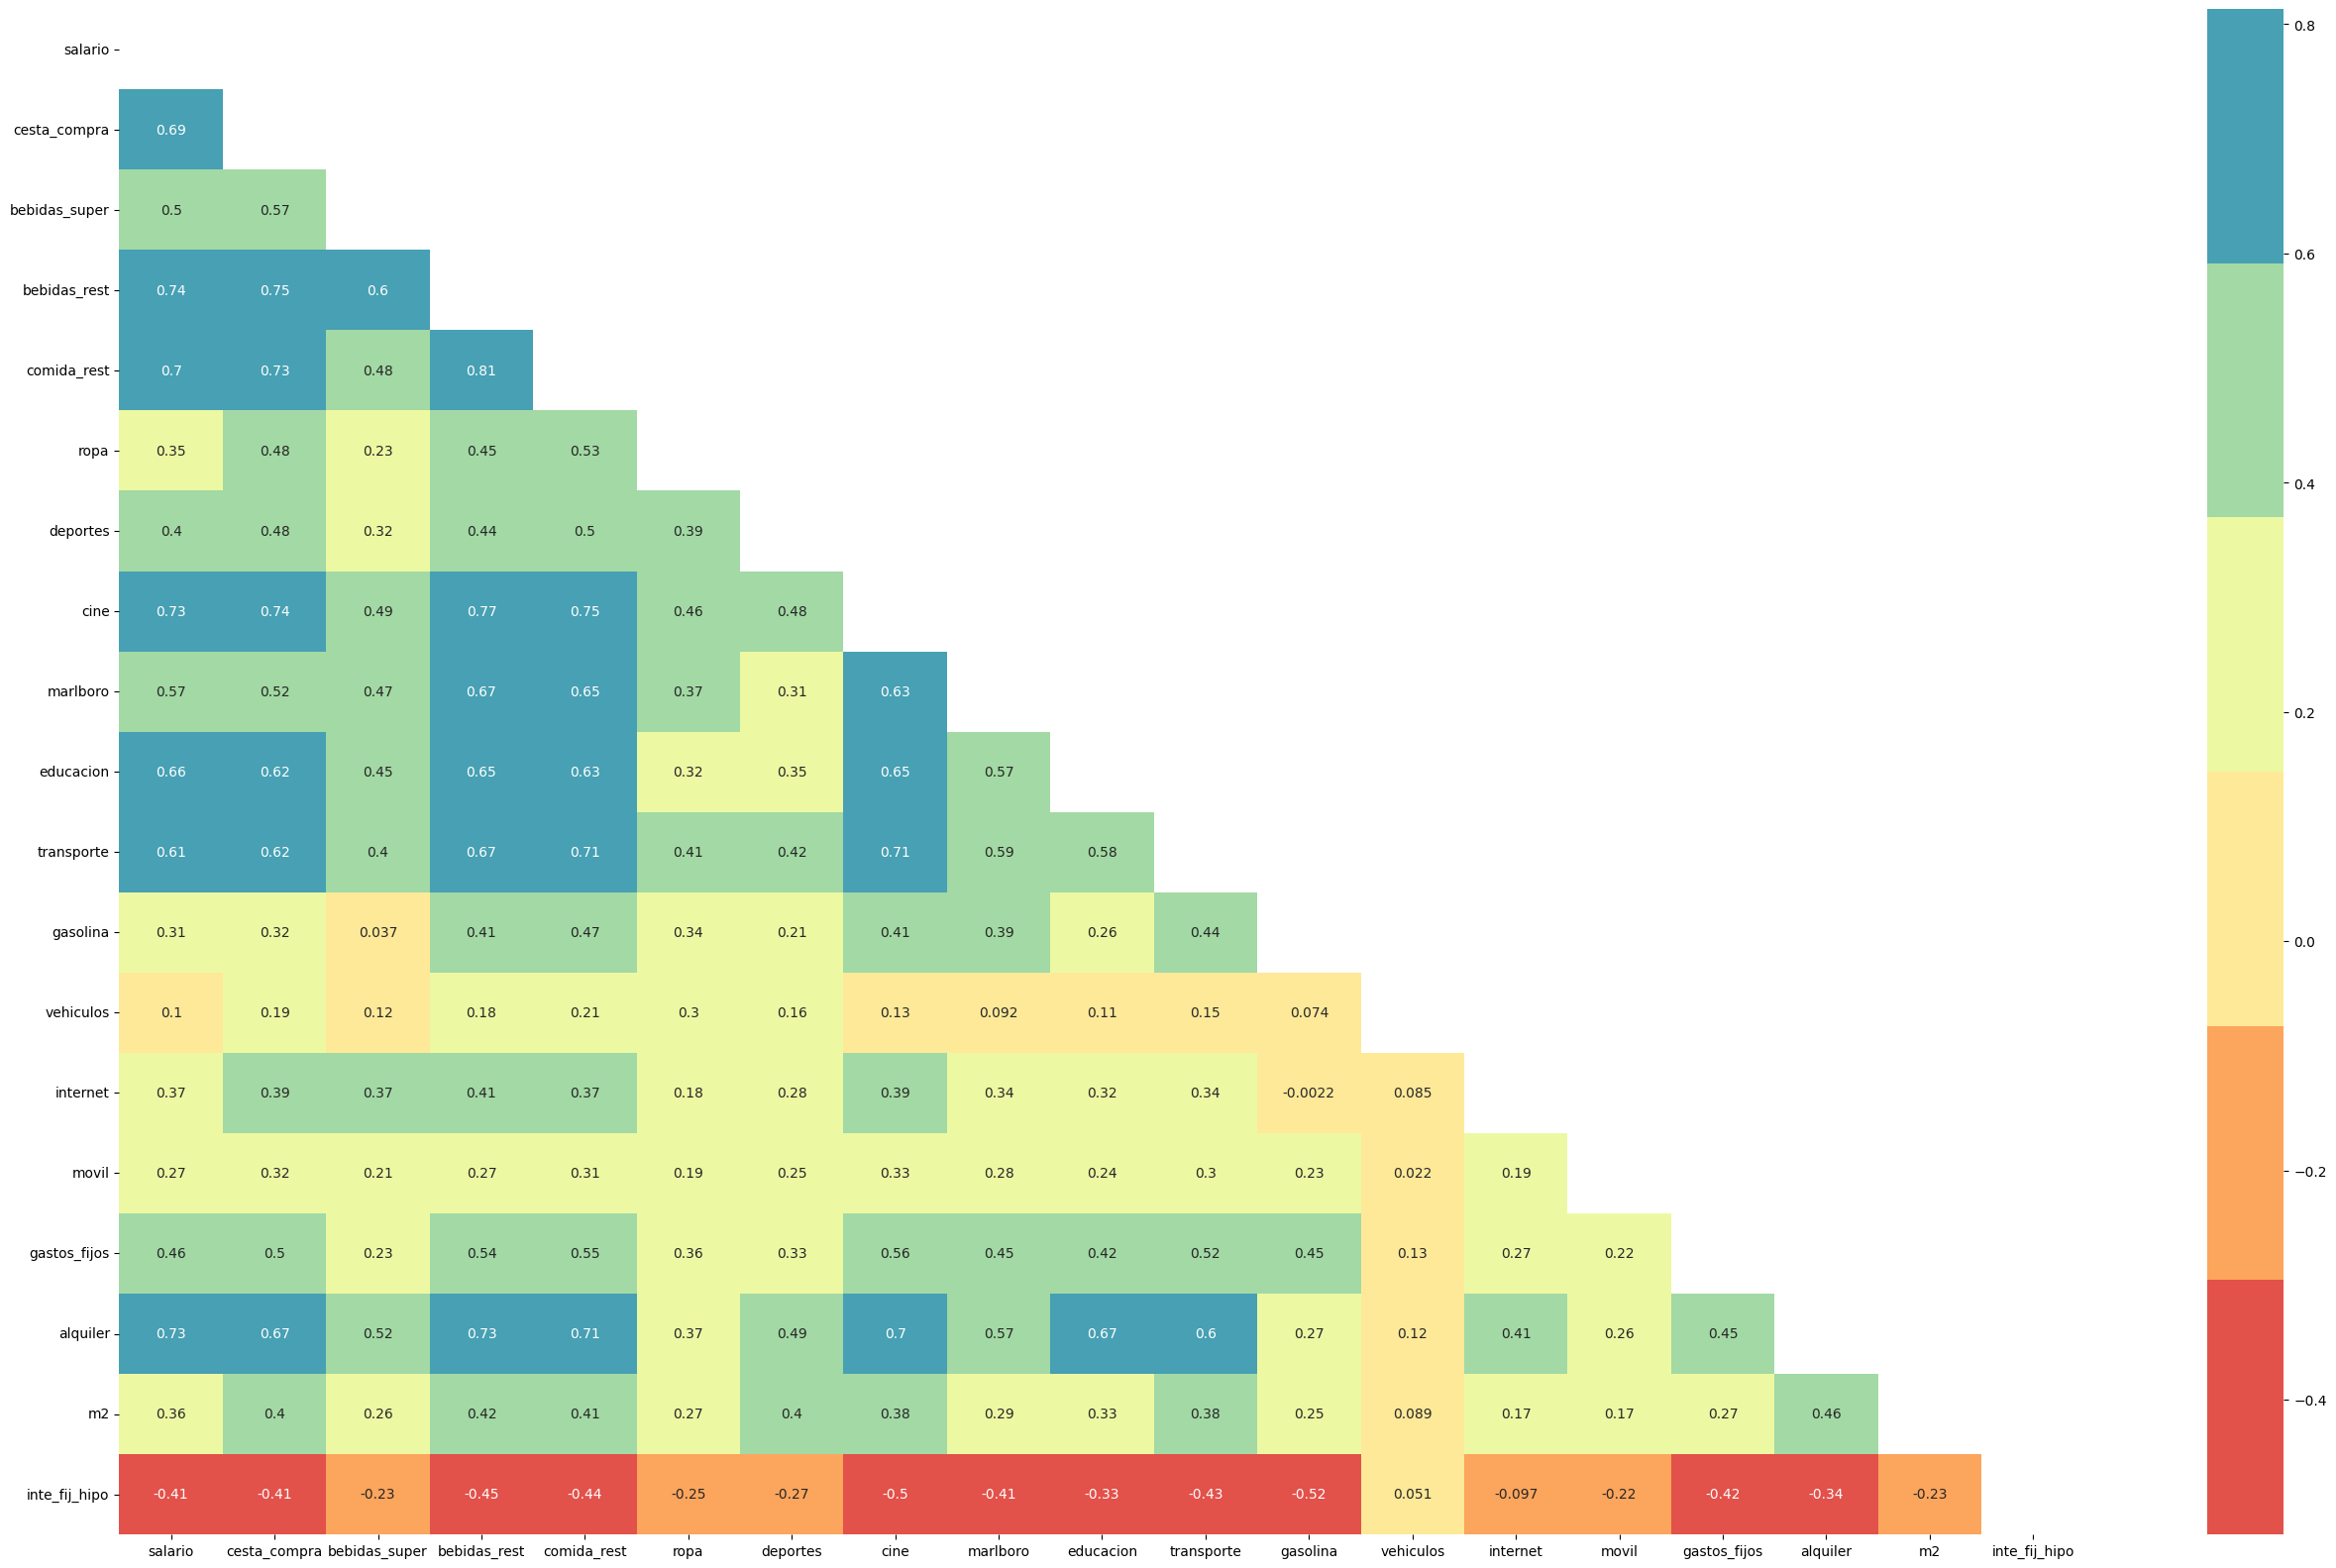

In [11]:
mask = np.triu(np.ones_like(df_numericas.corr(), dtype = np.bool_))
plt.figure(figsize=(32,20))
sns.heatmap(df_numericas.corr(), 
           cmap = qualitative_colors, 
            mask = mask,
           annot = True)
plt.savefig("../graficas/03_cov_corr_heatmap_corr.png");